In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
class node(object):
    
    def __init__(self,state):
        self.state=state
        self.inbound={}
        self.outbound={}
        self.cost=0
        
    def __str__(self):
        string="State: "+str(self.state)
        return string

In [3]:
n=6
U=10

np.random.seed(78440)
    
cvals=np.random.randint(1,U,n)
wvals=np.random.randint(1,U,n)
W=sum(wvals)/2
d=[0,1]

In [4]:
n1=50
U1=50
    
cvals1=np.random.randint(1,U1,n1)
wvals1=np.random.randint(1,U1,n1)
W1=sum(wvals1)/2

def read_instance(address = 'instance.csv'):
    data = pd.read_csv(address)
    c = data['c'].values
    w = data['w'].values
    W = data['W'].values[0]
    return c,w,W

In [5]:
nex=4

cvalsex=[7,8,6,14]
wvalsex=[3,3,4,6]
Wex=6

In [6]:
wvalstest = [90, 53, 32, 80, 90, 6, 61, 55, 76, 39, 16, 33, 63, 10, 16, 31, 18, 74, 100, 25, 9, 99, 23, 64, 14, 35, 44, 46, 80, 86, 70, 23, 52, 68, 50, 68, 24, 22, 57, 69, 88, 88, 11, 65, 9, 52, 13, 21, 10, 17, 47, 26, 28, 89, 24, 99, 57, 36, 27, 6, 12, 18, 9, 39, 43, 28, 8, 32, 47, 22, 11, 79, 19, 77, 79, 88, 100, 10, 97, 21, 82, 13, 57, 37, 59, 63, 14, 30, 37, 6, 6, 25, 65, 18, 55, 52, 48, 64, 21, 68, 85, 87, 1, 2, 86, 77, 86, 41, 17, 46, 38, 12, 97, 17, 17, 82, 21, 78, 72, 83, 28, 76, 50, 7, 98, 78, 80, 50, 91, 14, 79, 44, 38, 68, 50, 53, 84, 79, 13, 54, 80, 95, 44, 36, 37, 12, 5, 59, 76, 41]


cvalstest = [92, 44, 16, 51, 65, 94, 1, 87, 95, 12, 91, 25, 25, 16, 75, 7, 33, 46, 93, 20, 11, 28, 53, 65, 64, 32, 82, 14, 19, 18, 91, 8, 20, 81, 70, 66, 71, 88, 73, 22, 73, 78, 16, 37, 51, 87, 65, 77, 19, 9, 88, 66, 88, 61, 86, 5, 81, 60, 83, 49, 13, 24, 50, 7, 44, 85, 56, 64, 38, 84, 34, 29, 63, 11, 36, 86, 47, 96, 91, 73, 49, 88, 9, 84, 23, 40, 52, 71, 8, 98, 32, 29, 22, 68, 18, 36, 21, 76, 100, 80, 60, 2, 38, 74, 92, 84, 21, 37, 17, 3, 31, 69, 5, 69, 1, 17, 55, 35, 81, 76, 97, 21, 27, 22, 60, 48, 16, 42, 33, 6, 25, 10, 19, 32, 32, 20, 94, 67, 20, 35, 44, 49, 26, 22, 98, 93, 45, 36, 70, 53]

Wtest = 3553




ntest=len(wvalstest)


In [7]:
def Algorithm_1(n,cvals,wvals,W):
    
    d=[0,1]
    root_node=node(0)
    all_layers={}
    all_layers[0]={}
    all_layers[0][root_node.state]=root_node
    
    #Iterate through each layer
    for x in range(1,n):
        #Create next layer
        currLayer=all_layers[x-1]
        all_layers[x]={}
        nextLayer=all_layers[x]
        #Iterate through each node and action decision
        for currW, nodeInstance in currLayer.items():
            for decision in d:
                newstate=currW+(wvals[x-1]*decision)
                #Feasability check
                #Check if the new state already exists in the layer
                if newstate<=W:
                    if newstate in nextLayer:
                        #Add arc into arclist
                        cost=cvals[x-1]*decision
                        #Add arc into node inbound and outbound
                        nodeInstance.outbound[nextLayer[newstate]]=cost
                        nextLayer[newstate].inbound[nodeInstance]=cost
                    else:
                        #Create new node, add arc to arclist
                        new_node=node(newstate)
                        nextLayer[newstate]=new_node
                        cost=cvals[x-1]*decision
                        #Add arc to node inbound and outbound
                        nodeInstance.outbound[new_node]=cost
                        new_node.inbound[nodeInstance]=cost
        
    #Changed from W because Rachel said so
    terminal_node=node(-999)
    all_layers[n]={}
    all_layers[n][-999]=terminal_node
    
    for currW, nodeInstance in all_layers[n-1].items():
        for decision in d:
            newstate=currW+(wvals[n-1]*decision)
            if newstate<=W:
                cost=cvals[n-1]*decision
                nodeInstance.outbound[terminal_node]=cost
                terminal_node.inbound[nodeInstance]=cost
                
    #final_node=node(0)            
    #terminal_node.outbound[final_node]=0
                
    return all_layers

In [8]:
def Algorithm_2(all_layers,n):
     #Final reduction algorithm here we go
    reduced_layers=all_layers.copy()
    
    #Starting from the second last layer moving up
    for x in range(n-1,0,-1):
        #all_tails_found=False
        to_remove={}
        tail_list={}
        for nodeInstance in reduced_layers[x].values():
            #Add ending combination if not already in the tail list
            if tuple(nodeInstance.outbound.items()) not in tail_list:
                tail_list[tuple(nodeInstance.outbound.items())]=nodeInstance
            
            #If ending combination exists
            else:
                to_remove[nodeInstance.state]=nodeInstance
                #Redirect arcs
                for comingFrom, arcCost in nodeInstance.inbound.items():
                    tail_list[tuple(nodeInstance.outbound.items())].inbound[comingFrom]=arcCost
                    comingFrom.outbound[tail_list[tuple(nodeInstance.outbound.items())]]=arcCost
                    #Remove arcs from comingFrom node
                    if nodeInstance in comingFrom.outbound:
                        del(comingFrom.outbound[nodeInstance])
                        
        #Remove all duplicate nodes            
        for remove_node in to_remove.values():
            del(reduced_layers[x][remove_node.state])
        
    return reduced_layers

In [9]:
def Longest_Path(reduced_layers,cvals):
    #Initiate final score and trail list
    final_score=0
    trail=[0]*(len(reduced_layers)-1)
    
    #Iterate through every node and incoming arc, update highest cost found
    for x in range(len(reduced_layers)):
        for nodeInstance in reduced_layers[x].values():
            for comingFrom, arcCost in nodeInstance.inbound.items():
                #Only update arcs where cost > 0
                if (comingFrom.cost+arcCost)>nodeInstance.cost:
                    nodeInstance.cost=comingFrom.cost+arcCost
    
    #In the last layer of nodes find the node with the largest cost and set it as the final score
    for nodeInstance in reduced_layers[len(reduced_layers)-1].values():
        if nodeInstance.cost>final_score:
            final_score=nodeInstance.cost
            traceback_score=final_score
    
    #Trace back from terminal to root
    for x in range(len(reduced_layers)-2,-1,-1):
        temp_set=set()
        #For each layer, does the current cost-item cost value node exist?
        for nodeInstance in reduced_layers[x].values():
            temp_set.add(nodeInstance.cost)
        #If yes, then item was taken: set trail to 1 and update traceback score
        if (traceback_score-cvals[x]) in temp_set:
            trail[x]=1
            traceback_score-=cvals[x]
    
    return final_score, trail

In [10]:
def Complexity_Testing(n):
    
    y=[]
    Algo_1=[]
    Sol_1=[]
    Algo_2=[]
    Sol_2=[]
    Full_Solve=[]
    Reduced_Solve=[]
    
    for n_test in range(5,n+1):
        
        U_test=n_test
        c_test=np.random.randint(1,U_test,n_test)
        w_test=np.random.randint(1,U_test,n_test)
        W_test=sum(w_test)/2
        
        start1=time.time()
        all_layers=Algorithm_1(n_test,c_test,w_test,W_test)
        end1=time.time()
        [full_finalScore,full_trail]=Longest_Path(all_layers,c_test)
        end2=time.time()
        reduced_layers=Algorithm_2(all_layers,n_test)
        end3=time.time()
        [reduced_finalScore,reduced_trail]=Longest_Path(reduced_layers,c_test)
        end4=time.time()
        
        y.append(n_test)
        Algo_1.append(end1-start1)
        Sol_1.append(end2-end1)
        Algo_2.append(end3-end2)
        Sol_2.append(end4-end3)
        Full_Solve.append(end2-start1)
        Reduced_Solve.append((end4-end2)+(end1-start1))
    
    #plt.plot(y,Algo_1,label="Building")
    #plt.plot(y,Sol_1,label="Full solve")
    #plt.plot(y,Algo_2,label="Reduction")
    #plt.plot(y,Sol_2,label="Reduced solve")
    plt.plot(y,Full_Solve,label="Full Solve")
    plt.plot(y,Reduced_Solve,label="Reduced Solve")
    
    
    plt.legend()
    plt.show()
        
    return None

In [11]:
[cvals2,wvals2,W2]=read_instance()
n2=len(cvals2)

In [12]:
testset=[n2,cvals2,wvals2,W2]

start1=time.time()
all_layers=Algorithm_1(testset[0],testset[1],testset[2],testset[3])
end1=time.time()
[full_finalScore,full_trail]=Longest_Path(all_layers,testset[1])
end2=time.time()

reduced_layers=Algorithm_2(all_layers,testset[0])
end3=time.time()
[reduced_finalScore,reduced_trail]=Longest_Path(reduced_layers,testset[1])
end4=time.time()

if(full_finalScore==np.dot(full_trail,testset[1])):
    full_check="Passed!"
else:
    full_check="Failed"

if(reduced_finalScore==np.dot(reduced_trail,testset[1])):
    reduced_check="Passed!"
else:
    reduced_check="Failed"

In [13]:
#Just printing stuff, no biggie
    
print("Full BDD Build Time: {}ms".format(1000*(end1-start1)))
print("Full BDD Score Runtime: {}ms".format(1000*(end2-end1)))
print("Full BDD Optimal Solution: {}".format(full_finalScore))
print("Sanity Check: {}".format(full_check))
print("Full BDD Trail: {}\n".format(full_trail))


print("BDD Reduction Time: {}ms".format(1000*(end3-end2)))
print("Reduced BDD Solution: {}ms".format(1000*(end4-end3)))
print("Reduced BDD Optimal Solution: {}".format(reduced_finalScore))
print("Sanity Check: {}".format(reduced_check))
print("Reduced BDD Trail: {}\n".format(reduced_trail))

print("Total Runtime: {}s".format(end4-start1))

Full BDD Build Time: 208.8947296142578ms
Full BDD Score Runtime: 55.948734283447266ms
Full BDD Optimal Solution: 719
Sanity Check: Passed!
Full BDD Trail: [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

BDD Reduction Time: 54.967641830444336ms
Reduced BDD Solution: 29.001712799072266ms
Reduced BDD Optimal Solution: 719
Sanity Check: Passed!
Reduced BDD Trail: [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Total Runtime: 0.3488128185272217s


In [14]:
#Printing node and layer information
'''for key, layer in all_layers.items():
    print("Layer no: {}".format(key))
    print("Nodes in layer: {}".format(len(layer.values())))
    print("")
    for currWeight, nodeInstance in layer.items():
        print("Node: {}".format(currWeight))
        for goingTo, arcCost in nodeInstance.outbound.items():
            print("Arc cost: {}".format(arcCost))
    print("")'''

'for key, layer in all_layers.items():\n    print("Layer no: {}".format(key))\n    print("Nodes in layer: {}".format(len(layer.values())))\n    print("")\n    for currWeight, nodeInstance in layer.items():\n        print("Node: {}".format(currWeight))\n        for goingTo, arcCost in nodeInstance.outbound.items():\n            print("Arc cost: {}".format(arcCost))\n    print("")'

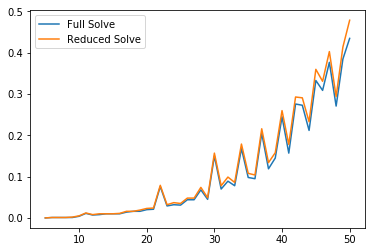

In [15]:
#Complexity testig
Complexity_Testing(50)